In [1]:
import os
import pandas as pd
import env
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from env import user, password, host
database_url_base = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/'

Along the way, we'll analyze the overall sales volume and profit, display the list of regional sales, find out the top ten commodities in sales volume, sales volume and profit, and draw the proportion chart of different types of customers.

A company’s market share is the percentage it controls of the total market for its products and services. Market share is an essential metric for businesses because it’s an indicator of a company’s profitability and success.

Gaining market share should be one of management’s primary goals because of its effect on operations and profitability.

The enormous benefits of market share underscore the importance of the strategies that can increase it.


Increasing your market share means increasing the number of sales. With more sales overall, economies of scale may mean that selling more of your products or services will allow you to save money per sale. For example, you may get better prices on the materials you use if you purchase larger quantities of them.

If a business is looking to increase market share one of the most common ways to do so is through innovation. Innovation is easily one of the top ways to increase market share. Whenever a company brings brand new technology or a new product to an industry, they have a value add that their competition doesn’t. 

In [16]:
import wrangle
df= wrangle.wrangle_superstore()

Saving to .csv


In [18]:
df = df.set_index('order_date').sort_index()

In [19]:
df

,order_id,ship_date,shipping_method,customer_id,segment,country,city,state,zip_code,product id,...,discount,profit,category_id,region_id,product name,category,sub_category,region_name,year,month
order_date,,,,,,,,,,,,,,,,,,,,,
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Home Office,United States,Naperville,Illinois,60540.0,OFF-LA-10003223,...,0.2,4.2717,3,3,Avery 508,Office Supplies,Labels,Central,2014,1
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Home Office,United States,Naperville,Illinois,60540.0,OFF-BI-10004094,...,0.8,-5.4870,9,3,GBC Standard Plastic Binding Systems Combs,Office Supplies,Binders,Central,2014,1
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Home Office,United States,Naperville,Illinois,60540.0,OFF-ST-10002743,...,0.2,-64.7748,5,3,SAFCO Boltless Steel Shelving,Office Supplies,Storage,Central,2014,1
2014-01-09,CA-2014-135405,2014-01-13,Standard Class,MS-17830,Consumer,United States,Laredo,Texas,78041.0,TEC-AC-10001266,...,0.2,9.7500,12,3,Memorex Micro Travel Drive 8 GB,Technology,Accessories,Central,2014,1
2014-01-09,CA-2014-135405,2014-01-13,Standard Class,MS-17830,Consumer,United States,Laredo,Texas,78041.0,OFF-AR-10004078,...,0.2,1.1680,7,3,Newell 312,Office Supplies,Art,Central,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30,CA-2017-115427,2018-01-03,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533.0,OFF-BI-10002103,...,0.2,4.5188,9,2,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",Office Supplies,Binders,West,2017,12
2017-12-30,CA-2017-143259,2018-01-03,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009.0,TEC-PH-10004774,...,0.0,2.7279,8,4,Gear Head AU3700S Headset,Technology,Phones,East,2017,12
2017-12-30,CA-2017-115427,2018-01-03,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533.0,OFF-BI-10004632,...,0.2,6.4750,9,2,Ibico Hi-Tech Manual Binding System,Office Supplies,Binders,West,2017,12


## How much did by year the store make and sell between 2014 and 2017?

In [14]:
#creating a pivot table to sum the sales and profit for each year. 
year_profit_sales=pd.pivot_table(data=df[['year','profit','sales']], 
                        index=['year'], 
                        values=['profit','sales'],
                        aggfunc='sum')
year_profit_sales

,profit,sales
year,,
2014,10041.2325,101075.5685
2015,10006.7669,92552.7542
2016,11225.3949,106836.2096
2017,6667.1350,96979.2931


<AxesSubplot:title={'center':'Year_performance'}, xlabel='category', ylabel='Maximum Sales'>

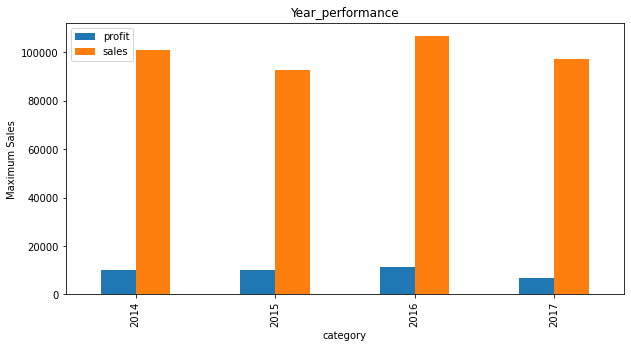

In [58]:
year_profit_sales.plot(kind='bar', title='Year_performance', ylabel='Maximum Sales',
         xlabel='category', figsize=(10, 5))
# Creating a bar plot to compare the profit vs sales. 

***Takeaways: looks like the sames and profit are not changing a lot***

In [59]:
year_profit_sales.sales.pct_change()
# looked up the percertage change compare to the last year. The profit is going down.

year
2014         NaN
2015   -0.084321
2016    0.154328
2017   -0.092262
Name: sales, dtype: float64

In [18]:
# looked up the percertage change compare to the last year. 
year_profit_sales.profit.pct_change()

year
2014         NaN
2015   -0.003432
2016    0.121780
2017   -0.406067
Name: profit, dtype: float64

***Overall sales are not increased much.***

What's the most profitable category? 

In [43]:
df_Category_profit = pd.pivot_table(data=df[['category','profit','sales','quantity']], 
                        index=['category'], 
                        values=['profit','sales','quantity'],
                        aggfunc='sum')

round(df_Category_profit.reset_index(),2)
#create a category pivot table to show the most profitable category and 
#sub-category. 

,category,profit,quantity,sales
0,Furniture,-623.25,1401.0,139575.59
1,Office Supplies,19312.43,3974.0,112423.68
2,Technology,19251.34,1205.0,145444.56


<AxesSubplot:title={'center':'Category vs Profit'}, xlabel='category', ylabel='Maximum Sales'>

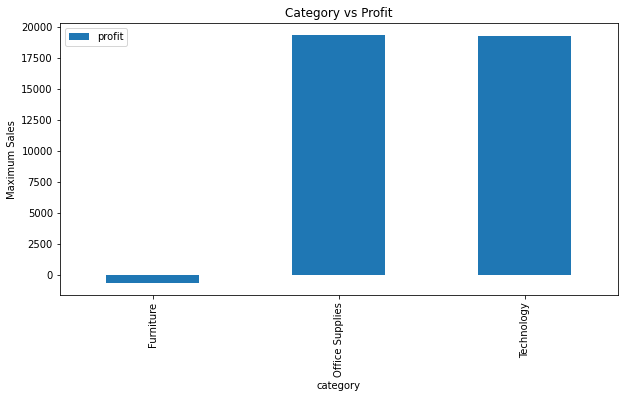

In [12]:
#Just polot all items and see if there are anyhing outstanding. 
df_Category_profit.plot(kind='bar', title='Category vs Profit', ylabel='Maximum Sales',
         xlabel='category', figsize=(10, 5))

## Which was the most profitable sub-category? 

In [61]:
df_Category_profit = pd.pivot_table(data=df[['category','sub_category','profit','sales']], 
                        index=['category','sub_category'], 
                        values=['profit','sales'],
                        aggfunc='sum')

df_Category_profit
#create a category pivot table to show the most profitable category and 
#sub-category. 

profit       sales
category        sub_category                       
Furniture       Bookcases    -2267.7776  20280.1429
                Chairs        4306.3499  54409.2150
                Furnishings   2124.3447  16442.0180
                Tables       -4786.1621  48444.2095
Office Supplies Appliances    2776.4985  17415.0360
                Art           1336.4246   6346.8080
                Binders       4062.6403  28108.2820
                Envelopes     1394.5297   3349.8260
                Fasteners      215.6470    632.6640
                Labels        1544.5261   3415.5860
                Paper         5464.4993  12671.9140
                Storage       2771.6621  37373.6200
                Supplies      -253.9979   3109.9440
Technology      Accessories   7786.3621  30675.6040
                Copiers       5598.3914  14509.7220
                Machines      -680.6722  44215.5200
                Phones        6547.2634  56043.7140

<AxesSubplot:title={'center':'Category vs Maximum Sales'}, xlabel='category', ylabel='Maximum Sales'>

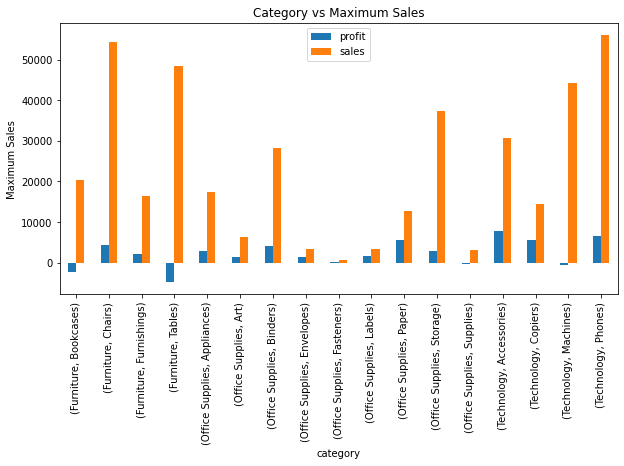

In [78]:
#Just polot all items and see if there are anyhing outstanding. 
df_Category_profit.plot(kind='bar', title='Category vs Maximum Sales', ylabel='Maximum Sales',
         xlabel='category', figsize=(10, 5))

***Takeawys: looks like the accessories, coipers and phones, papers are top profitable items***

In [16]:
#We would look at the avg profit_per item_sold. 
Avg_profit_per_item_sold = (df.groupby('sub_category')['profit'].sum()) / (df.groupby('sub_category')['quantity'].sum())
Avg_profit_per_item_sold= Avg_profit_per_item_sold.sort_values(ascending=False).head()

<AxesSubplot:title={'center':'The most profitable sub-category'}, xlabel='Sub Category', ylabel='Avg_profit_per_item_sold'>

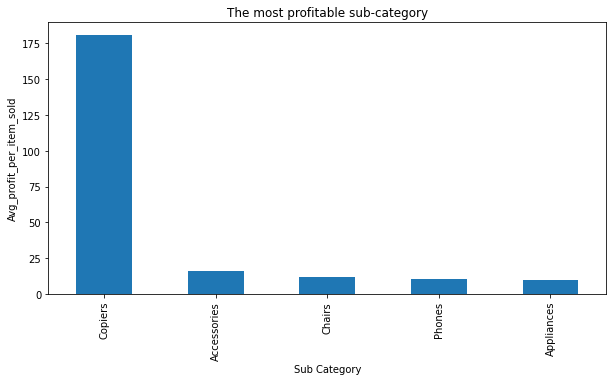

In [18]:
Avg_profit_per_item_sold.plot(kind='bar', title='The most profitable sub-category', ylabel='Avg_profit_per_item_sold',
         xlabel='Sub Category', figsize=(10, 5))

In [21]:
subset = df[df['category'] !='Furniture']

<AxesSubplot:xlabel='sub_category'>

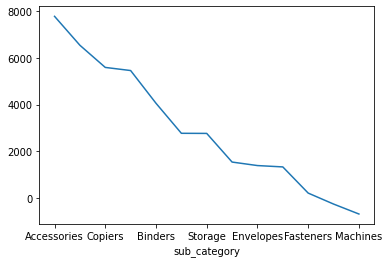

In [27]:
subset.groupby('sub_category')['profit'].sum().sort_values(ascending=False).plot()


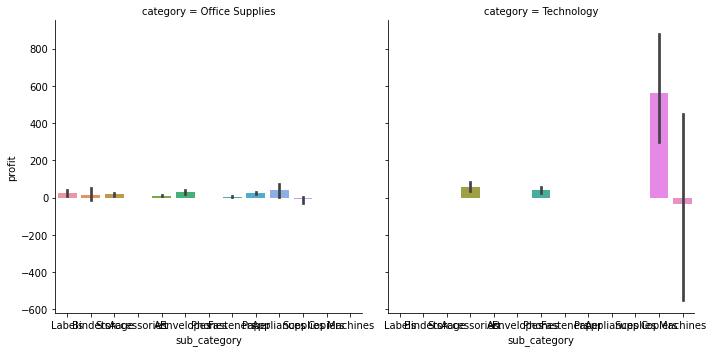

In [39]:
sns.catplot(
    data=subset,
    x="sub_category", y='profit',
    col="category", kind = 'bar')

### When we look at the avg profit per item sold, we can see copiers and accessories are the top two sub categories. Surprise to find out that we have only sold 31 copiers but the profit per item are the top 1.

## From which state do we get maximum profit and sales volumn?

In [95]:
#Lets see State vs Maximum Profit
state_profit_df = pd.pivot_table(data=df[['state','profit','sales']], 
                        index=['state'], 
                        values=['profit','sales'],
                        aggfunc='sum')

state_profit_df.sort_values(by='profit', ascending=False).head()

,profit,sales
state,,
New York,13782.5569,60810.6160
California,11028.5963,68103.3185
Washington,6180.3892,21165.9340
Georgia,4807.5942,11903.4800
Michigan,4335.9916,17074.6880


In [97]:
df.groupby(by='state').sum().sort_values('sales',ascending=False).head(5)

,region_id,category_id,postal_code,sales,quantity,discount,profit,year,month
state,,,,,,,,,
California,652,2607,30039063.0,68103.3185,1258.0,23.60,11028.5963,657085,2647
New York,960,1890,2519561.0,60810.6160,925.0,13.90,13782.5569,483808,1971
Texas,501,1392,12810819.0,42798.5034,633.0,59.48,-5692.7992,336627,1326
Pennsylvania,548,1151,2616594.0,24613.6000,507.0,45.80,-5561.4145,276130,1025
Washington,164,679,8048417.0,21165.9340,296.0,5.20,6180.3892,165286,656


***Top five states that produce the most sales are CA, NY, TX, PA, WA. ***

## How was 2017 Q4 performance?

In [75]:
#Creating a subset for the year of 2017 Q4. 
oct_nov_dec_2017 = df[((df['month'] == 11) | (df['month'] == 12) | (df['month'] == 10))& (df['year'] == 2017)]

In [76]:
pd.pivot_table(data=oct_nov_dec_2017[['category','sub-category','discount','profit','sales']], 
                        index=['category','sub-category','discount'], 
                        values=['profit','sales'],
                        aggfunc='sum')
# creating the pivot table to see id there any categories that are lossing money. 

profit      sales
category        sub-category discount                      
Furniture       Bookcases    0.15         4.2882  1764.3280
                             0.20        16.9172   515.1200
                             0.32       -11.5960    78.8528
                Chairs       0.00       226.9644   872.9400
                             0.10       575.7010  3362.1300
                             0.20       -67.7057  2848.5040
                             0.30       -27.2840   318.2900
                Furnishings  0.00       426.0018  1272.1800
                             0.20        92.0865  1896.2880
                             0.60       -19.8178    25.7000
                Tables       0.00       116.8720  1669.6000
                             0.20      -112.9527  1004.0240
                             0.40      -695.4264  2349.6840
                             0.50      -604.7148   938.1700
Office Supplies Appliances   0.00      1323.0513  4552.7600
                             0.20        18.1556   198.5920
                             0.80      -203.6754    75.6080
                Art          0.00       134.7135   407.2700
                             0.20        26.7015   312.2320
                Binders      0.00       289.7814   613.6200
                             0.20       290.6189   861.6720
                             0.70       -38.7557    56.8890
                             0.80       -34.0224    19.5840
                Envelopes    0.00         7.4872    15.2800
                             0.20        21.5910    57.5760
                Fasteners    0.00        24.0523    69.2100
                             0.20         2.5707    10.8240
                Labels       0.00        77.6544   163.2100
                             0.20        20.9670    58.9600
                Paper        0.00       289.9117   609.6000
                             0.20       131.9049   410.7280
                Storage      0.00       653.8787  2996.5200
                             0.20         2.0843  1803.9840
                Supplies     0.20         0.5004     6.6720
Technology      Accessories  0.00       340.4027   953.9400
                             0.20       -15.0187   328.2640
                Copiers      0.20       434.9913  1199.9760
                Machines     0.50     -3839.9904  7999.9800
                             0.70       -63.9960    95.9940
                Phones       0.00        45.5906   398.6900
                             0.20       333.4246  3092.0560
                             0.40       -81.2348   650.2680

## What happen to 2017 Nov? 

In [15]:
#Let's take a closer look at 2017 Nov 
df['month'] = pd.DatetimeIndex(df['order_date']).month

In [31]:
#Creating a subset. 
nov_2017 = df[(df['month'] == 11) & (df['year'] == 2017)]

In [32]:
#Create a pivot table to take a look at the discount for each subcategories. 
pd.pivot_table(data=nov_2017[['category','sub-category','discount','profit','sales']], 
                        index=['category','sub-category','discount'], 
                        values=['profit','sales'],
                        aggfunc='sum')

profit     sales
category        sub-category discount                     
Furniture       Chairs       0.1        436.1308  2220.192
                             0.2        -91.0980  1527.840
                Furnishings  0.0        130.8622   349.500
                             0.2         63.6297  1539.712
                             0.6        -13.9930    15.992
                Tables       0.4       -619.5960  2065.320
                             0.5       -131.4450   219.075
Office Supplies Appliances   0.2         14.6510   167.440
                             0.8        -24.7086     9.324
                Art          0.0         50.7070   174.460
                             0.2         14.2401   155.136
                Binders      0.0        138.2016   287.920
                             0.2         75.7133   226.816
                             0.7        -34.0076    50.106
                             0.8        -32.0880    18.336
                Envelopes    0.0          7.4872    15.280
                Fasteners    0.0          1.4208     2.960
                             0.2          2.5707    10.824
                Labels       0.0          5.6994    12.390
                             0.2         12.2730    34.120
                Paper        0.0         82.6124   175.440
                             0.2         97.4301   306.568
                Storage      0.0        110.8852   485.680
                             0.2        -65.7101  1014.416
                Supplies     0.2          0.5004     6.672
Technology      Accessories  0.0        176.9573   474.280
                             0.2        -18.3912   314.064
                Machines     0.5      -3839.9904  7999.980
                             0.7        -63.9960    95.994
                Phones       0.2         19.6158   261.544
                             0.4        -24.4792   340.692

***Looks like we didn't sell any copiers in 2017 Nov***
***and machines are taking too much discount*** 

## Overall Q4 Sales for the past three years. 

In [27]:
#only get the subset for every year's Q4. 
oct_nov_dec = df[(df['month'] == 11) | (df['month'] == 12)|(df['month'] == 10)]
oct_nov_dec

,order_id,ship_date,shipping_method,customer_id,segment,country,city,state,zip_code,product id,...,discount,profit,category_id,region_id,product name,category,sub_category,region_name,year,month
order_date,,,,,,,,,,,,,,,,,,,,,
2014-10-03,CA-2014-153976,2014-10-08,Second Class,BP-11290,Consumer,United States,Evanston,Illinois,60201.0,FUR-CH-10002880,...,0.3,-70.1043,2,3,"Global High-Back Leather Tilter, Burgundy",Furniture,Chairs,Central,2014,10
2014-10-06,CA-2014-134677,2014-10-10,Standard Class,XP-21865,Consumer,United States,San Diego,California,92024.0,TEC-AC-10001445,...,0.0,1.9089,12,2,Imation USB 2.0 Swivel Flash Drive USB flash d...,Technology,Accessories,West,2014,10
2014-10-07,CA-2014-117429,2014-10-13,Standard Class,MR-17545,Home Office,United States,Philadelphia,Pennsylvania,19140.0,FUR-FU-10000222,...,0.2,21.1120,6,4,"Seth Thomas 16"" Steel Case Clock",Furniture,Furnishings,East,2014,10
2014-10-12,CA-2014-139451,2014-10-16,Standard Class,DN-13690,Consumer,United States,San Francisco,California,94122.0,OFF-AR-10002053,...,0.0,4.1720,7,2,"Premium Writing Pencils, Soft, #2 by Central A...",Office Supplies,Art,West,2014,10
2014-10-12,CA-2014-139451,2014-10-16,Standard Class,DN-13690,Consumer,United States,San Francisco,California,94122.0,OFF-ST-10002370,...,0.0,6.2031,5,2,Sortfiler Multipurpose Personal File Organizer...,Office Supplies,Storage,West,2014,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30,CA-2017-115427,2018-01-03,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533.0,OFF-BI-10002103,...,0.2,4.5188,9,2,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",Office Supplies,Binders,West,2017,12
2017-12-30,CA-2017-143259,2018-01-03,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009.0,TEC-PH-10004774,...,0.0,2.7279,8,4,Gear Head AU3700S Headset,Technology,Phones,East,2017,12
2017-12-30,CA-2017-115427,2018-01-03,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533.0,OFF-BI-10004632,...,0.2,6.4750,9,2,Ibico Hi-Tech Manual Binding System,Office Supplies,Binders,West,2017,12


In [36]:
round(oct_nov_dec[oct_nov_dec['sub_category']=='Machines'].discount.mean(),2)

0.43

In [43]:
round(subset.groupby('sub_category').discount.mean(),2)

sub_category
Accessories    0.08
Copiers        0.14
Machines       0.34
Phones         0.17
Name: discount, dtype: float64

In [33]:
oct_nov_dec.discount

order_date
2014-10-03    0.3
2014-10-06    0.0
2014-10-07    0.2
2014-10-12    0.0
2014-10-12    0.0
             ... 
2017-12-30    0.2
2017-12-30    0.0
2017-12-30    0.2
2017-12-30    0.2
2017-12-30    0.0
Name: discount, Length: 637, dtype: float64

In [90]:
#create the pivot table
oct_nov_dec = nov_dec.groupby('year', as_index=False).agg({'sales': sum,
                                                         'profit': sum,
                                                         

                                                         })

In [91]:
oct_nov_dec

,year,sales,profit
0,2014,36294.9195,5237.9934
1,2015,30874.6652,1723.0218
2,2016,31531.1040,6097.0994
3,2017,46935.7698,112.6743


In [92]:
oct_nov_dec.pct_change()

,year,sales,profit
0,NaN,NaN,NaN
1,0.000497,-0.149339,-0.671053
2,0.000496,0.021261,2.538608
3,0.000496,0.488555,-0.981520


***Sales in Q4 keep increasing for two years.***

In [ ]:
sns.barplot(x = "monthly_charges_level", y ='churn_encoded', data = train)

In [ ]:
the_list = df[df['sub_category'] != 'Paper']
the_list = the_list[the_list['sub_category'] != 'Supplies']
the_list = the_list[the_list['sub_category'] != 'Bookcases']
the_list = the_list[the_list['sub_category'] != 'Fasteners']
the_list = the_list[the_list['sub_category'] != 'Tables']
the_list = the_list[the_list['sub_category'] != 'Labels']
the_list = the_list[the_list['sub_category'] != 'Art']
the_list = the_list[the_list['sub_category'] != 'Storage']
the_list = the_list[the_list['sub_category'] != 'Furnishings']
the_list = the_list[the_list['sub_category'] != '']
the_list.groupby('sub_category').resample('m').profit.sum().unstack(0).plot()
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

In [20]:
subset = df[df['category'] =='Technology']
subset

,order_id,ship_date,shipping_method,customer_id,segment,country,city,state,zip_code,product id,...,discount,profit,category_id,region_id,product name,category,sub_category,region_name,year,month
order_date,,,,,,,,,,,,,,,,,,,,,
2014-01-09,CA-2014-135405,2014-01-13,Standard Class,MS-17830,Consumer,United States,Laredo,Texas,78041.0,TEC-AC-10001266,...,0.2,9.7500,12,3,Memorex Micro Travel Drive 8 GB,Technology,Accessories,Central,2014,1
2014-01-13,CA-2014-162775,2014-01-15,Second Class,CS-12250,Corporate,United States,Bossier City,Louisiana,71111.0,TEC-AC-10003174,...,0.0,258.6960,12,1,Plantronics S12 Corded Telephone Headset System,Technology,Accessories,South,2014,1
2014-01-16,CA-2014-115791,2014-01-18,Second Class,DL-13315,Consumer,United States,Philadelphia,Pennsylvania,19134.0,TEC-PH-10004614,...,0.4,-31.0500,8,4,AT&T 841000 Phone,Technology,Phones,East,2014,1
2014-01-20,US-2014-147627,2014-01-26,Standard Class,HL-15040,Consumer,United States,Jonesboro,Arkansas,72401.0,TEC-PH-10001061,...,0.0,181.9818,8,1,Apple iPhone 5C,Technology,Phones,South,2014,1
2014-02-01,CA-2014-140795,2014-02-03,First Class,BD-11500,Consumer,United States,Green Bay,Wisconsin,54302.0,TEC-AC-10001432,...,0.0,206.3160,12,3,Enermax Aurora Lite Keyboard,Technology,Accessories,Central,2014,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-10,CA-2017-157651,2017-12-14,Standard Class,HA-14920,Consumer,United States,Philadelphia,Pennsylvania,19120.0,TEC-AC-10003116,...,0.2,3.3725,12,4,Memorex Froggy Flash Drive 8 GB,Technology,Accessories,East,2017,12
2017-12-11,CA-2017-101798,2017-12-15,Standard Class,MV-18190,Consumer,United States,New York City,New York,10009.0,TEC-AC-10001998,...,0.0,13.5932,12,4,Logitech LS21 Speaker System - PC Multimedia -...,Technology,Accessories,East,2017,12
2017-12-18,CA-2017-140585,2017-12-23,Second Class,RA-19915,Consumer,United States,Encinitas,California,92024.0,TEC-AC-10003610,...,0.0,57.5904,12,2,Logitech Illuminated - Keyboard,Technology,Accessories,West,2017,12


Text(0, 0.5, 'Profit in Dollars')

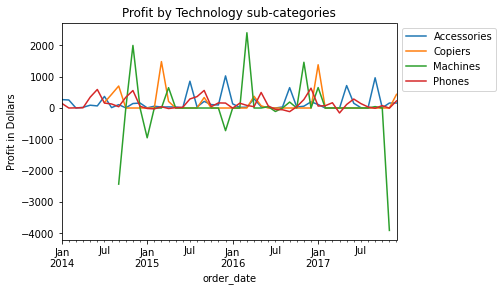

In [23]:
subset.groupby('sub_category').resample('m').profit.sum().unstack(0).plot()
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.title('Profit by Technology sub-categories')
plt.ylabel('Profit in Dollars')

<AxesSubplot:xlabel='sub_category'>

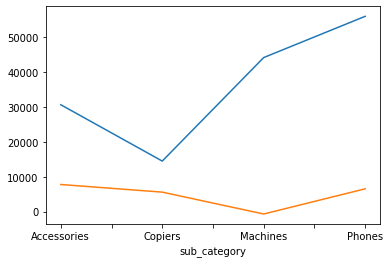

In [26]:
subset.groupby('sub_category')['sales'].sum().plot()
subset.groupby('sub_category')['profit'].sum().plot()

In [48]:
df.head()

,order_id,ship_date,shipping_method,customer_id,segment,country,city,state,zip_code,product id,...,discount,profit,category_id,region_id,product name,category,sub_category,region_name,year,month
0,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Home Office,United States,Naperville,Illinois,60540.0,OFF-LA-10003223,...,0.2,4.2717,3,3,Avery 508,Office Supplies,Labels,Central,2014,1
1,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Home Office,United States,Naperville,Illinois,60540.0,OFF-BI-10004094,...,0.8,-5.4870,9,3,GBC Standard Plastic Binding Systems Combs,Office Supplies,Binders,Central,2014,1
2,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Home Office,United States,Naperville,Illinois,60540.0,OFF-ST-10002743,...,0.2,-64.7748,5,3,SAFCO Boltless Steel Shelving,Office Supplies,Storage,Central,2014,1
3,CA-2014-135405,2014-01-13,Standard Class,MS-17830,Consumer,United States,Laredo,Texas,78041.0,TEC-AC-10001266,...,0.2,9.7500,12,3,Memorex Micro Travel Drive 8 GB,Technology,Accessories,Central,2014,1
4,CA-2014-135405,2014-01-13,Standard Class,MS-17830,Consumer,United States,Laredo,Texas,78041.0,OFF-AR-10004078,...,0.2,1.1680,7,3,Newell 312,Office Supplies,Art,Central,2014,1
